In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Image Cropping

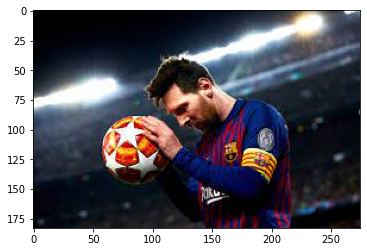

In [9]:
a1 = cv2.imread('m1.jpg')
a1 = cv2.cvtColor(a1,cv2.COLOR_BGR2RGB)
plt.imshow(a1)
plt.show() # (55,30),(170,150)

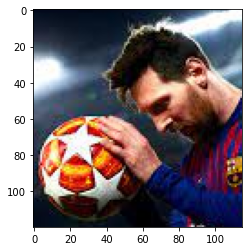

In [10]:
#                    img[y1:y2,x1:x2]
a1_face_football = a1[30:150,55:170]
plt.imshow(a1_face_football)
plt.show()

### Geometric Transformations
Refer - https://docs.opencv.org/3.4/da/d6e/tutorial_py_geometric_transformations.html

1) Image Translation<br>
2) Image Rotation<br>
3) Affine Transformation<br>
4) Perspective Transformation<br>


### 1) Image Translation
Translation is simply the shifting of object location. Suppose we have a point P(x,y) which is translated by (tx, ty), then the coordinates after translation denoted by P'(x’,y’) 

<img src="img_translation1.png" heihgt="300" width="300" align="left">

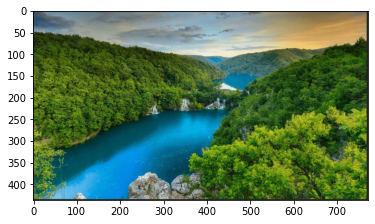

In [15]:
m1 = cv2.imread('scenary1.png')
m1 = cv2.cvtColor(m1,cv2.COLOR_BGR2RGB)
plt.imshow(m1)
plt.show()

In [22]:
rows,cols = m1.shape[:2]
print(rows,cols)

436 772


In [29]:
print(cv2.__version__)

# conda remove opencv
# conda install -c conda-forge opencv=4.6.0

# conda install -c conda-forge opencv=4.1.0


4.5.4


In [28]:
cv2.imshow('Original Image', m1)
cv2.waitKey(10)
cv2.destroyAllWindows()

error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1274: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [23]:
# m1 = cv2.imread('scenary1.png',1)
# m1 = cv2.cvtColor(m1,cv2.COLOR_BGR2RGB)
# rows,cols = m1.shape[:2]

# tx = 50 and ty= 80
M1 = np.float32([[1,0,50],[0,1,80]])
M2 = np.float32([[1,0,50],[0,1,-80]])  
M3 = np.float32([[1,0,-50],[0,1,80]])  
M4 = np.float32([[1,0,-50],[0,1,-80]])  

# warpAffine(src, M, size of output)

dst1 = cv2.warpAffine(m1,M1,(cols,rows))
dst2 = cv2.warpAffine(m1,M2,(cols,rows))
dst3 = cv2.warpAffine(m1,M3,(cols,rows))
dst4 = cv2.warpAffine(m1,M4,(cols,rows))

cv2.imshow('Original Image', m1)
cv2.imshow('Translated Image1', dst1)   # bottom right
cv2.imshow('Translated Image2', dst2)   # top right
cv2.imshow('Translated Image3', dst3)   # bottom left
cv2.imshow('Translated Image4', dst4)   # top left
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1274: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [ ]:
# plt.imshow(dst1)
# plt.title('Translated Image')
# plt.imshow(dst2)
# plt.title('Translated Image2')
# plt.imshow(dst3)
# plt.title('Translated Image3')
# plt.imshow(dst4)
# plt.title('Translated Image on top left')
# plt.show()

### 2) Image Rotation
Suppose we have a point P(x,y) at an angle alpha and distance r from the origin as shown below. Now we rotate the point P about the origin by an angle theta in the clockwise direction. 
<img src="img_rotation1.png" heihgt="300" width="300">
<img src="img_rotation2.png" heihgt="300" width="300">

#### Rotation using cv2.getRotationMatrix2D

<b>transform_matrix = cv2.getRotationMatrix2D(center, angle, scale)</b>

1) center: Center of the rotation in the source image.<br>
2) angle: Rotation angle in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the top-left corner).<br>
3) scale:	Isotropic scale factor.<br>

500 500


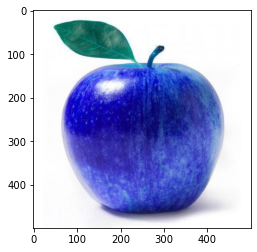

In [30]:
img = cv2.imread('apple.jpg',1)
rows,cols,_ = img.shape
print(rows,cols)
# img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

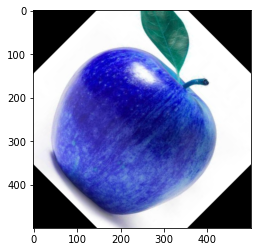

In [38]:
 
# # Create the transformation matrix
# M = cv2.getRotationMatrix2D((cols/2,rows/2),45,1) # 45 is anti-clockwise rotation
M = cv2.getRotationMatrix2D((cols/2,rows/2),-45,1)  # -45 is clockwise rotation
# M = cv2.getRotationMatrix2D((cols,rows),-45,1)
# Pass it to warpAffine function
dst = cv2.warpAffine(img,M,(cols,rows))
 
    
plt.imshow(dst)
plt.show()
# cv2.imshow('img',dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

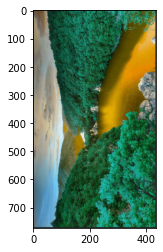

In [41]:
img = cv2.imread('scenary1.png',1)
rows,cols,_ = img.shape
rotated_image = cv2.transpose(img)
plt.imshow(rotated_image)
plt.show()
# cv2.imshow('Original img',img)
# cv2.imshow('Rotated img',rotated_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

### Image Resizing
1) It helps in reducing the number of pixels from an image and that has several advantages e.g. It can reduce the time of training of a neural network as more is the number of pixels in an image more is the number of input nodes that in turn increases the complexity of the model.

2) It also helps in zooming in images. Many times we need to resize the image i.e. either shrink it or scale up to meet the size requirements. OpenCV provides us several interpolation methods for resizing an image.

####    Interpolation Methods
1) cv2.INTER_AREA: This is used when we need to shrink an image.<br>
2) cv2.INTER_CUBIC: Can be used for shrinking and zooming both<br>
3) cv2.INTER_LINEAR: This is primarily used when zooming is required. This is the default interpolation technique in OpenCV.



Note
1) It is important to keep in mind the original aspect ratio of the image (i.e. width by height), if you want to maintain the same in the resized image too.<br>
2) Reducing the size of an image will require resampling of the pixels. 
Increasing the size of an image requires reconstruction of the image. This means you need to interpolate new pixels.

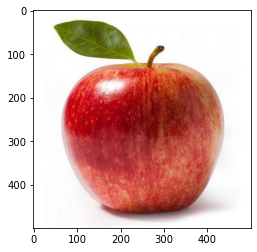

In [42]:
d1 = cv2.imread('apple.jpg')
d1 = cv2.cvtColor(d1,cv2.COLOR_BGR2RGB)
plt.imshow(d1)
plt.show()

In [43]:
print(d1.shape)

(500, 500, 3)


In [45]:
print(r1.shape)
print(r2.shape)
print(r3.shape)
print(r4.shape)

(350, 350, 3)
(800, 800, 3)
(800, 400, 3)
(400, 800, 3)


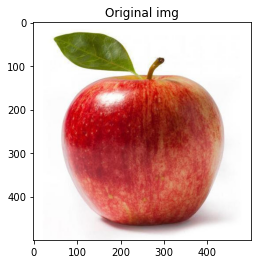

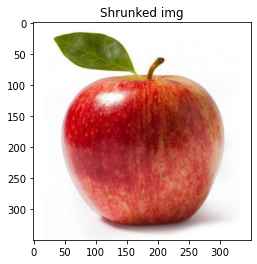

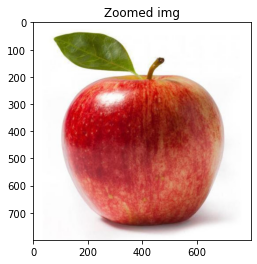

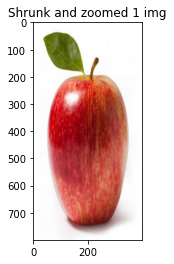

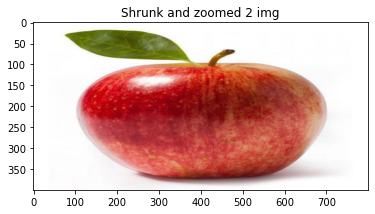

(<matplotlib.image.AxesImage at 0x1b6ffc76250>,
 Text(0.5, 1.0, 'Shrunk and zoomed 2 img'),
 None)

In [44]:
r1 = cv2.resize(d1,(350,350),cv2.INTER_AREA)
r2 = cv2.resize(d1,(800,800),cv2.INTER_LINEAR)
r3 = cv2.resize(d1,(400,800),cv2.INTER_CUBIC)
r4 = cv2.resize(d1,(800,400),cv2.INTER_CUBIC)

plt.imshow(d1),plt.title('Original img'),plt.show()
plt.imshow(r1),plt.title('Shrunked img'),plt.show()
plt.imshow(r2),plt.title('Zoomed img'),plt.show()
plt.imshow(r3),plt.title('Shrunk and zoomed 1 img'),plt.show()
plt.imshow(r4),plt.title('Shrunk and zoomed 2 img'),plt.show()

### Thresholding
Thresholidng is connverting greyscale images into its binary format

#### Methods of Thresholding

Assumed threshold is t

1) <b>cv2.THRESH_BINARY</b><br>
Converts pixels below t to 0(black) and above t to 255(white).

2) <b>cv2.THRESH_BINARY_INV</b><br>
Converts pixels below t to 255(white) and above t to 0(black)

3) <b>cv2.THRESH_TRUNC</b><br>
Pixels below t remain unchanged and pixels above t are truncated (held at t).

4) <b>cv2.THRESH_TOZERO</b><br>  Pixels below t are converted to 0(black) and pixels above t held as it is (remain unchanged)

5) <b>cv2.THRESH_TOZERO_INV</b><br>  Pixels above t are converted to 0(black) and pixels below t are held as it is (remain unchanged)

(551, 900)


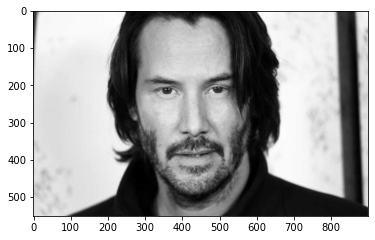

In [51]:
z = cv2.imread('kneau.jpg',0)
plt.imshow(z,'gray')
print(z.shape)
plt.show()

In [50]:
z[85]

array([ 62,  75,  97, 120, 143, 167, 188, 200, 218, 226, 235, 241, 243,
       243, 245, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246,
       246, 246, 246, 246, 246, 246, 246, 246, 245, 244, 244, 243, 242,
       242, 243, 243, 242, 242, 241, 240, 240, 239, 241, 242, 242, 243,
       244, 244, 245, 245, 246, 246, 246, 246, 246, 246, 246, 246, 247,
       247, 246, 246, 245, 244, 244, 243, 244, 244, 244, 244, 244, 244,
       244, 244, 242, 242, 243, 244, 244, 245, 246, 246, 246, 246, 246,
       246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246,
       245, 245, 245, 245, 245, 245, 245, 245, 244, 244, 244, 244, 244,
       244, 244, 244, 244, 244, 244, 244, 244, 244, 244, 244, 244, 244,
       244, 244, 244, 244, 244, 244, 244, 244, 244, 244, 244, 244, 244,
       244, 244, 244, 244, 244, 244, 244, 244, 244, 244, 244, 244, 244,
       244, 244, 244, 244, 246, 246, 246, 246, 246, 246, 246, 246, 246,
       246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 24

#### THRESH_BINARY
Converts pixels below t to 0(black) and above t to 255(white).

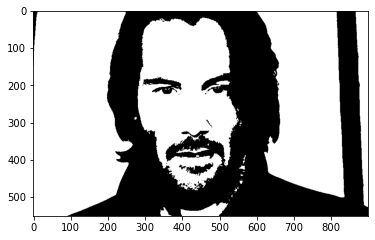

In [54]:
t = 127
_,t1 = cv2.threshold(z,t,255,cv2.THRESH_BINARY)
plt.imshow(t1,'gray')
plt.show()

In [55]:
t1[85]

array([  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

#### THRESH_BINARY_INV
Converts pixels below t to 255(white) and above t to 0(black)

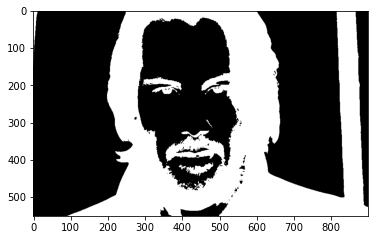

In [60]:
t = 127
_,t2 = cv2.threshold(z,t,255,cv2.THRESH_BINARY_INV)
plt.imshow(t2,'gray')
plt.show()

In [61]:
t2[85]

array([255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

### THRESH_TRUNC


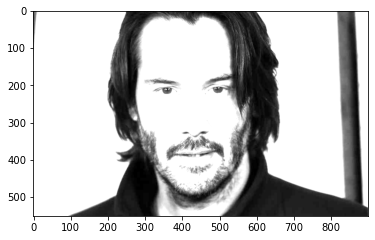

In [62]:
t = 127
_,t3 = cv2.threshold(z,t,255,cv2.THRESH_TRUNC)
plt.imshow(t3,'gray')
plt.show()

In [63]:
t3[85]

array([ 62,  75,  97, 120, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 12

#### THRESH_TOZERO

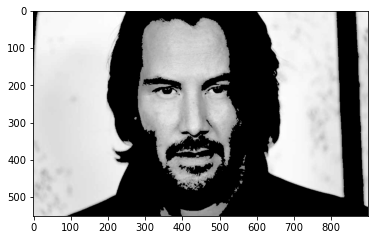

In [66]:
t = 127
_,t4 = cv2.threshold(z,t,255,cv2.THRESH_TOZERO)
plt.imshow(t4,'gray')
plt.show()

### 5) Filtering

a) Blurring

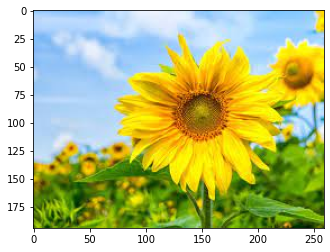

In [67]:
f1 = cv2.imread('flower.jpg')
f1 = cv2.cvtColor(f1,cv2.COLOR_BGR2RGB)
plt.imshow(f1)
plt.show()

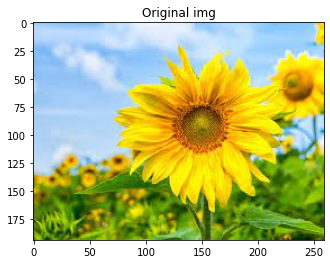

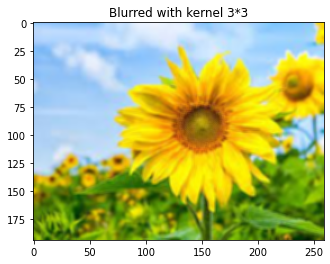

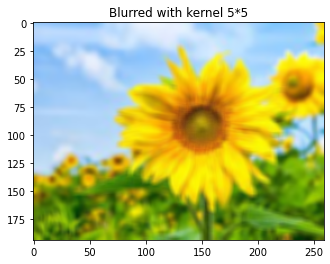

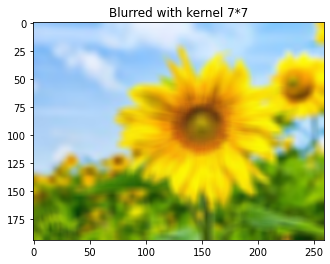

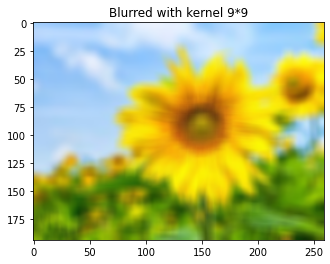

(<matplotlib.image.AxesImage at 0x1b69a141910>,
 Text(0.5, 1.0, 'Blurred with kernel 9*9'),
 None)

In [68]:
# kernel or filter
k1 = np.ones((3,3))/9
k2 = np.ones((5,5))/25
k3 = np.ones((7,7))/49
k4 = np.ones((9,9))/81

r1 = cv2.filter2D(f1,-1,k1)
r2 = cv2.filter2D(f1,-1,k2)
r3 = cv2.filter2D(f1,-1,k3)
r4 = cv2.filter2D(f1,-1,k4)

plt.imshow(f1),plt.title('Original img'),plt.show()
plt.imshow(r1),plt.title('Blurred with kernel 3*3'),plt.show()
plt.imshow(r2),plt.title('Blurred with kernel 5*5'),plt.show()
plt.imshow(r3),plt.title('Blurred with kernel 7*7'),plt.show()
plt.imshow(r4),plt.title('Blurred with kernel 9*9'),plt.show()